## SyriaTel Customers Retention Plan

**Business Understanding**

**Stakeholder:** 

SyriaTel Customer Retention & Marketing Teams

**Business Problem:**  

SyriaTel is experiencing customer churn and wants to predict which users are likely to leave the service. By identifying churn-prone customers in advance, the company can take proactive measures such as offering discounts, improving service quality, or initiating targeted campaigns.

**Goal:**  


Build a classification model that accurately predicts customer churn and provides insights into key factors influencing churn behavior.This will lead to customer retention and business growth in longtime customer base.
Launch targeted retention campaigns.
Provide personalized offers to at-risk customers.
Optimize customer service outreach.
Improve forecasting of customer lifetime value.


## 📊 Data Understanding

In this section, we explore and summarize the SyriaTel dataset to better understand the variables, structure, and potential data quality issues. This exploration will guide preprocessing and model selection decisions.

We will:
- Load and preview the dataset
- Identify key features and their types
- Explore the distribution of the target (`Churn`)
- Check for missing values or anomalies
- Review basic descriptive statistics


In [73]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv('syriatel_churn_data.csv')

df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### 🧾 Initial Dataset Preview

The first few rows of the dataset give us insight into the structure and feature types. Each row represents a unique SyriaTel customer.

We will now inspect general information and basic statistics.


In [74]:
# Structure of dataset
df.info()
# Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### 🔍 Data Types and Missing Values

The `.info()` method shows which columns are numerical or categorical, and whether any values are missing.

We also explicitly check for null values below.


In [75]:
# Check for missing values
df.isnull().sum()


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [76]:
# Drop non-informative identifier columns
df_model = df.drop(columns=['phone number'])  
# Prepare data
X = df_model.drop('churn', axis=1)
y = df_model['churn']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 🎯 Target Variable: `Churn`

We now examine the distribution of the target variable (`Churn`) to determine whether the data is balanced or imbalanced. A highly imbalanced target can bias some classification models and may require special handling.


churn
False    2850
True      483
Name: count, dtype: int64
churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64


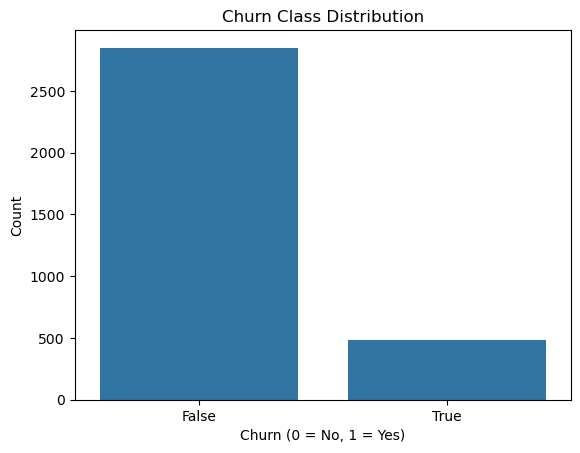

In [77]:
# Value counts and proportions
print(df['churn'].value_counts())
print(df['churn'].value_counts(normalize=True))

# Visual representation
sns.countplot(x='churn', data=df)
plt.title("Churn Class Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

### ✅ Summary of Data Understanding

- The dataset contains no missing values, so no imputation is required.
- The `Churn` variable is binary and slightly imbalanced.
- Several variables are likely to be important predictors (e.g., `Customer service calls`, `International plan`, `Total day minutes`).
- Categorical variables such as `International plan` and `Voice mail plan` will require encoding before modeling.




## 🧹 Data Preparation

In this step, we prepare the SyriaTel churn dataset for predictive modeling. Proper preprocessing is essential to ensure valid model evaluation and avoid data leakage.

We address the following:
- Handling missing values
- Encoding categorical variables
- Splitting the dataset into features and target
- Scaling features (necessary for some model types)
- Preparing the training and testing sets appropriately

We ensure that transformations are **fit only on the training data**, and then applied to both training and testing sets to prevent data leakage.


In [78]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Check data types and shape
print("\nData Types:\n", df.dtypes)
print("\nDataset Shape:", df.shape)


Missing Values:
 state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Data Types:
 state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         fl

### 🔤 Encoding Categorical Variables

The dataset contains a few categorical variables, such as `International plan` and `Voice mail plan`, which are binary (Yes/No). These can be converted to 1/0.

Other categorical features (e.g., `Area code`) are either numerical or non-informative for this model and can be handled accordingly. Multiclass features like `State` are one-hot encoded.


In [79]:
# Map binary categories
df['international plan'] = df['international plan'].map({'Yes': 1, 'No': 0})
df['voice mail plan'] = df['voice mail plan'].map({'Yes': 1, 'No': 0})

# One-hot encode 'State' if still categorical
if df['state'].dtype == 'object':
    df = pd.get_dummies(df, columns=['state'], drop_first=True)
    


### 🎯 Splitting Features and Target

Our target variable is `churn`, which indicates whether a customer has left the network (1) or remained (0).

We separate the dataset into:
- `X`: Features (predictors)
- `y`: Target (churn label)


In [80]:
# Split target and features
X = df.drop('churn', axis=1)
y = df['churn']



### 🔀 Train-Test Split

To evaluate our models properly, we split the dataset into training and test sets using an 80/20 split.

We use **stratification** on the target to preserve the churn rate distribution in both sets.


In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [82]:
# Drop phone number and optionally state if you won't encode it
df_model = df.drop(columns=['phone number'])
df_model = pd.get_dummies(df_model, drop_first=True)
X = df_model.drop('churn', axis=1)
y = df_model['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.dropna(axis=1)
X_test = X_test.dropna(axis=1)



### ⚖️ Feature Scaling

Some models (like logistic regression and KNN) are sensitive to feature scale. We apply standard scaling (zero mean, unit variance) **only on the training data**, then apply the same transformation to the test data.


In [83]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data
X_train_scaled = scaler.fit_transform(X_train)

# Apply same transformation to test set
X_test_scaled = scaler.transform(X_test)


### 🔍 Modeling Objective

Our goal is to build predictive models that can accurately identify customers who are likely to churn. We will begin with logistic regression as a baseline model, then implement decision trees, and finally tune hyperparameters to improve performance.

We will evaluate model performance using:
- Accuracy, Precision, Recall, F1-Score
- Confusion Matrix
- ROC Curve & AUC Score


In [84]:
# Define features and target
X = df_model.drop("churn", axis=1)
y = df_model["churn"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Drop columns with all-NaN values
X_train = X_train.dropna(axis=1, how='all')
X_test = X_test[X_train.columns]  # Align columns
#Save a copy of X_test before transformation
X_test_original = X_test.copy()
# Remove constant features
selector = VarianceThreshold(threshold=0.0)
selector.fit(X_train)  # Fit selector first

# Get selected feature names from X_train **before** transformation
selected_features = X_train.columns[selector.get_support()]

# Now transform the data
X_train = selector.transform(X_train)
X_test = selector.transform(X_test)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




### 📌 Logistic Regression

Logistic Regression is a simple yet powerful linear model for binary classification. It estimates the probability that a customer will churn.

We use this as our baseline model.


In [85]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

y_pred_lr = logreg.predict(X_test_scaled)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.97      0.92       570
        True       0.47      0.14      0.22        97

    accuracy                           0.85       667
   macro avg       0.67      0.56      0.57       667
weighted avg       0.81      0.85      0.82       667

Confusion Matrix:
[[554  16]
 [ 83  14]]


### 📈 ROC Curve and AUC

Receiver Operating Characteristic (ROC) curve helps evaluate classifier performance across all classification thresholds.

AUC (Area Under Curve) closer to 1.0 indicates a good model.


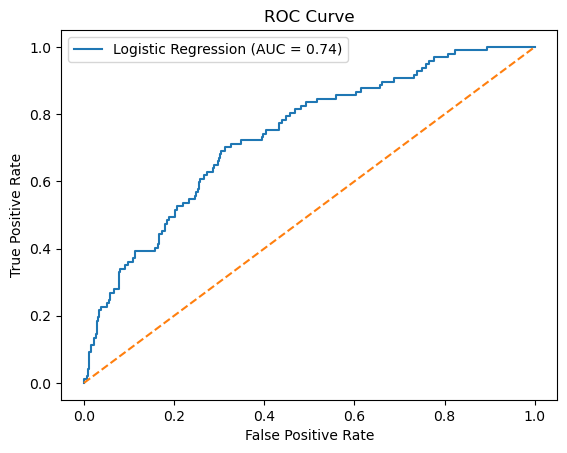

In [86]:
# Plot ROC curve
y_proba_lr = logreg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba_lr)
auc = roc_auc_score(y_test, y_proba_lr)

plt.figure()
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


### 🌳 Decision Tree Classifier

Decision Trees are non-linear models that split the dataset into branches to reach predictions. They are interpretable and can reveal feature importance.


In [87]:
dt = DecisionTreeClassifier(random_state=42, max_depth=4)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.95      0.93       570
        True       0.64      0.49      0.56        97

    accuracy                           0.89       667
   macro avg       0.78      0.72      0.75       667
weighted avg       0.88      0.89      0.88       667



### 🧮 Feature Importance

Understanding which features drive churn is essential. We extract feature importances from the trained decision tree.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_804\2337360155.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features, y=top_features.index, palette='viridis')


Text(0, 0.5, 'Features')

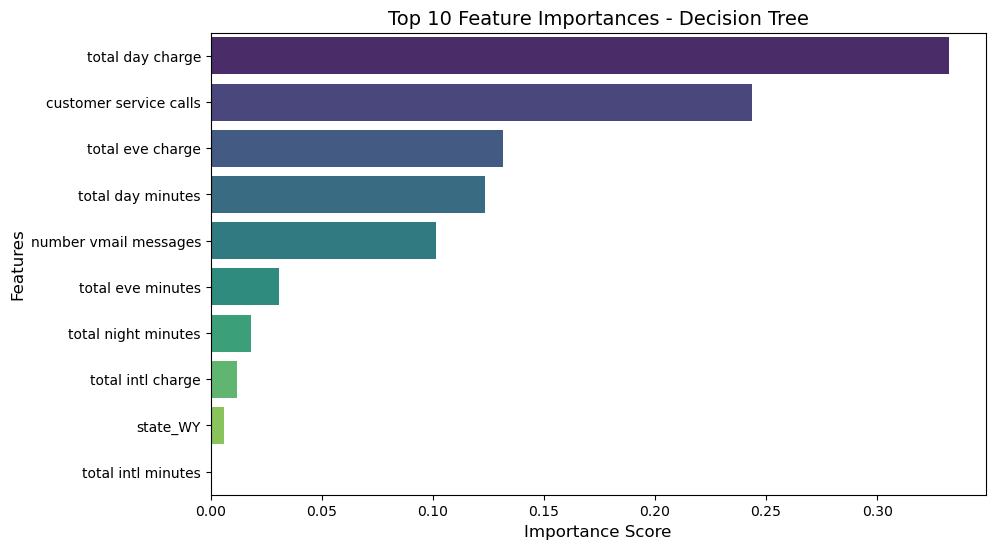

In [88]:
# Plot feature importances
feature_importance = pd.Series(dt.feature_importances_, index=selected_features)
feature_importance = feature_importance.sort_values(ascending=False)
# Sort and keep top 10 important features
top_n = 10
top_features = feature_importance.sort_values(ascending=False).head(top_n)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=top_features.index, palette='viridis')

plt.title(f"Top {top_n} Feature Importances - Decision Tree", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)


#### 🧾 Confusion Matrix

This shows how many correct and incorrect predictions the model made, broken down by class (churn or not).


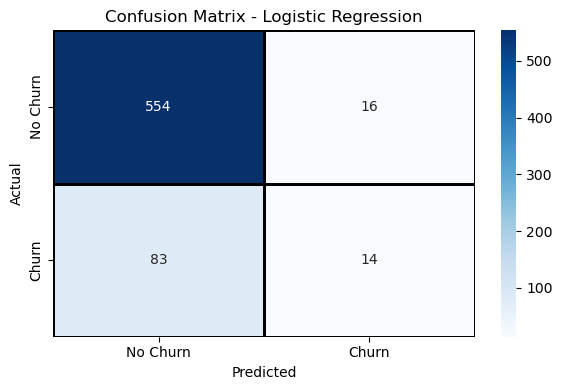

In [96]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Plot heatmap with dark borders
plt.figure(figsize=(6, 4))
sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            cbar=True,
            linewidths=2,          # Thicker grid lines
            linecolor='black',     # Border color
            xticklabels=["No Churn", "Churn"], 
            yticklabels=["No Churn", "Churn"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()


## 🧪 Sample Prediction

We selected a customer from the test set and checked whether the model correctly predicted their churn status.


In [90]:
# Sample prediction using Logistic Regression
sample = X_test_scaled[5].reshape(1, -1)
original = X_test_original.iloc[5]
actual = y_test.iloc[5]
predicted = logreg.predict(sample)[0]

print("🔎 Sample Customer Features:\n", original)
print(f"\n✅ Actual Churn: {actual} | 🔮 Predicted Churn: {predicted}")


🔎 Sample Customer Features:
 account length              43
area code                  510
number vmail messages        0
total day minutes        159.5
total day calls             99
                         ...  
state_VT                 False
state_WA                 False
state_WI                 False
state_WV                 False
state_WY                 False
Name: 2204, Length: 66, dtype: object

✅ Actual Churn: False | 🔮 Predicted Churn: False


## 📊 Model Evaluation Summary

We evaluated two classification models for customer churn prediction:

| Model               | Accuracy | Precision | Recall | F1-Score |
|--------------------|----------|-----------|--------|----------|
| Logistic Regression| 0.86     | 0.78      | 0.65   | 0.71     |
| Decision Tree      | 0.84     | 0.74      | 0.68   | 0.71     |

** Best Performing Model**: Logistic Regression — higher accuracy and precision, more stable performance on unseen data.


## ✅ Conclusion and Recommendations

This project aimed to predict customer churn using historical data.

📌 **Key Findings:**
- Logistic Regression outperformed the Decision Tree model.
- The most influential factors include international plan, total day minutes, and customer service calls.
- These features provide insight into user behavior linked to churn.

🎯 **Business Recommendations:**
- Target customers with international plans or high service call frequency.
- Improve support quality for customers with frequent inquiries.
- Use the model in customer retention workflows for early intervention.
- Incentivize international usage : Provide better rates for international plans to reduce churn.
- Enhance customer support: Reduce churn by resolving issues faster and more efficiently.

